In [572]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [573]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [574]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [575]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    #raise NotImplementedError
    err=y-tx.dot(w)
    return 0.5*np.mean(err**2) #np.mean(np.abs(err)) for MAE

# 2. Grid Search

Fill in the function `grid_search()` below:

In [576]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    #raise NotImplementedError
    losses=np.zeros((len(grid_w0),len(grid_w1)))

    for i,w0 in enumerate(grid_w0):
        for j,w1 in enumerate(grid_w1):
            w=np.array([w0,w1])
            losses[i,j]=compute_loss(y,tx,w)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678197, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.004 seconds


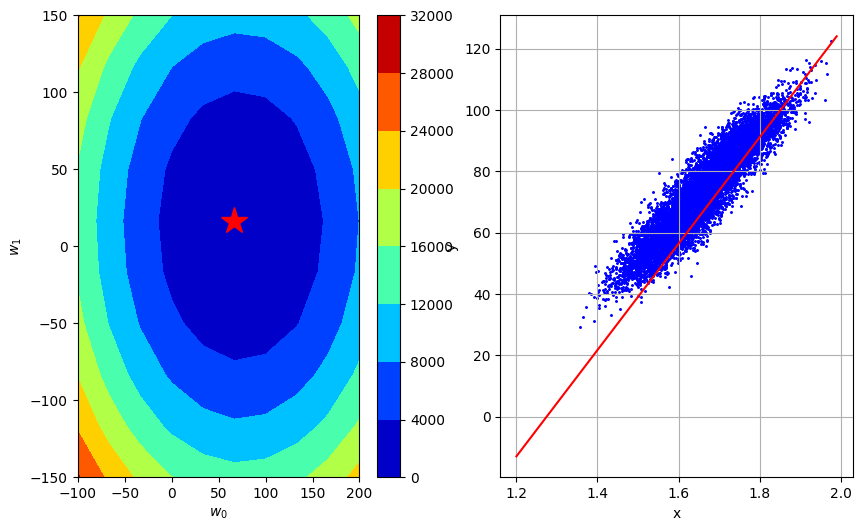

In [577]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [578]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # ***************************************************
    #raise NotImplementedError
    err=y-tx.dot(w)
    grad= -(tx.T.dot(err))/len(y)
    return grad

Please fill in the functions `gradient_descent` below:

In [579]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters + 1 containing the model parameters as numpy arrays of shape (2, ),
            for each iteration of GD (as well as the final weights)
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        grad=compute_gradient(y,tx,w)
        loss=compute_loss(y,tx,w)
        #raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w=ws[n_iter]-gamma*grad
        #raise NotImplementedError

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [580]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.236712759167, w0=51.30574540147368, w1=9.435798704492605
GD iter. 1/49: loss=265.3024621089567, w0=66.69746902191572, w1=12.266538315840165
GD iter. 2/49: loss=37.87837955044061, w0=71.31498610804832, w1=13.115760199244395
GD iter. 3/49: loss=17.410212120174382, w0=72.70024123388808, w1=13.370526764265657
GD iter. 4/49: loss=15.568077051450452, w0=73.11581777164001, w1=13.446956733772033
GD iter. 5/49: loss=15.402284895265295, w0=73.2404907329656, w1=13.469885724623945
GD iter. 6/49: loss=15.38736360120863, w0=73.27789262136326, w1=13.476764421879517
GD iter. 7/49: loss=15.38602068474353, w0=73.28911318788256, w1=13.478828031056189
GD iter. 8/49: loss=15.385899822261674, w0=73.29247935783836, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638305, w0=73.2934892088251, w1=13.47963283863509
GD iter. 10/49: loss=15.3858879656522, w0=73.29379216412111, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543452, w0=73.29388305070992, w1=13.479705271317192
GD

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

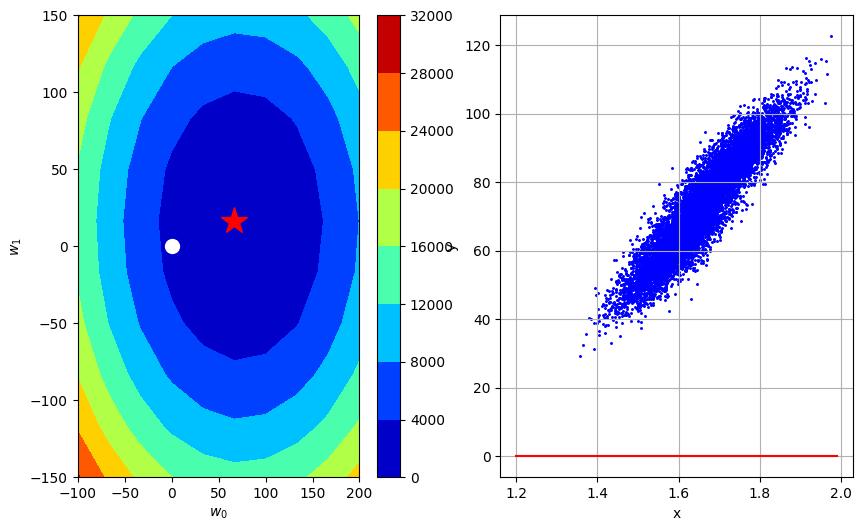

In [552]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 4. Stochastic gradient descent

In [553]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    #raise NotImplementedError
    e_b = y - tx.dot( w)
    grad = -(tx.T.dot( e_b)) / len(y)
    w = w - gamma * grad
    return w


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************
        #raise NotImplementedError
        for y_b, tx_b in batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
            w=compute_stoch_gradient(y_b, tx_b, w)

        loss = compute_loss(y,tx,w)

        losses.append(loss)
        ws.append(w)

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [554]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2269.653872053072, w0=7.390462144571419, w1=0.6239764710341706
SGD iter. 1/49: loss=2030.8999647687044, w0=12.341385366169256, w1=-4.291512380555822
SGD iter. 2/49: loss=1645.383642792256, w0=18.668005622731997, w1=-3.133678837131797
SGD iter. 3/49: loss=1419.8643259558876, w0=23.78415187421665, w1=-5.434291320370406
SGD iter. 4/49: loss=1357.2728757408252, w0=26.237727192628082, w1=-8.187971008252639
SGD iter. 5/49: loss=1291.0809018272207, w0=28.893599718819658, w1=-10.603505976534745
SGD iter. 6/49: loss=1144.5674300262642, w0=32.37423545040616, w1=-10.685186423180612
SGD iter. 7/49: loss=847.3090256521318, w0=37.78724196652685, w1=-6.598184576841313
SGD iter. 8/49: loss=846.7497413975282, w0=37.99544853763274, w1=-6.934632475767488
SGD iter. 9/49: loss=589.8193741785319, w0=43.73964946820436, w1=-3.115827556566529
SGD iter. 10/49: loss=434.7906439617045, w0=47.67721242000138, w1=-0.03301128644853124
SGD iter. 11/49: loss=385.89619536943235, w0=49.92791775059255

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

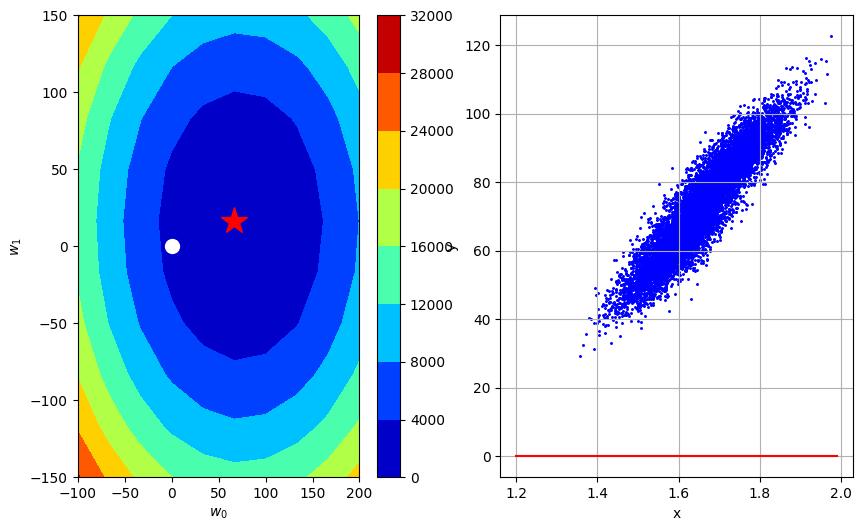

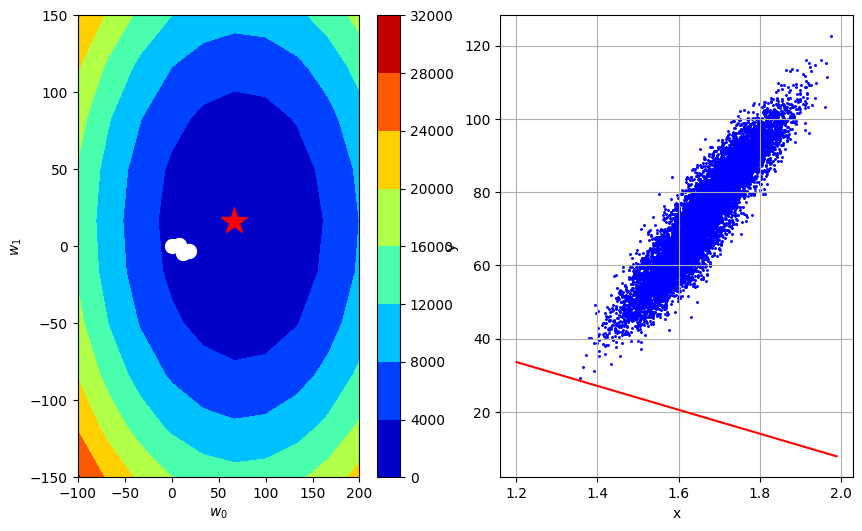

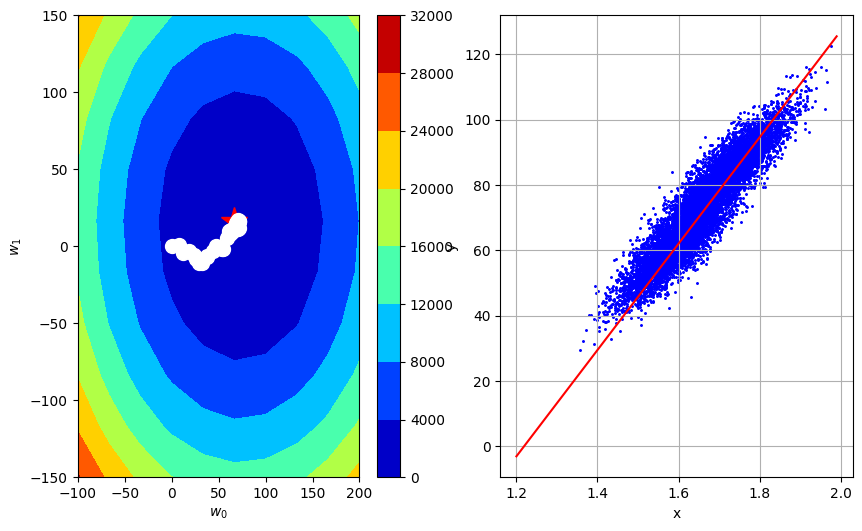

In [555]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

# 5. Effect of Outliers and MAE Cost Function

In [556]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
#raise NotImplementedError
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [557]:
y.shape, tx.shape

((200,), (200, 2))

Grid Search: loss*=40.30342362683201, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.001 seconds
GD: execution time=0.119 seconds


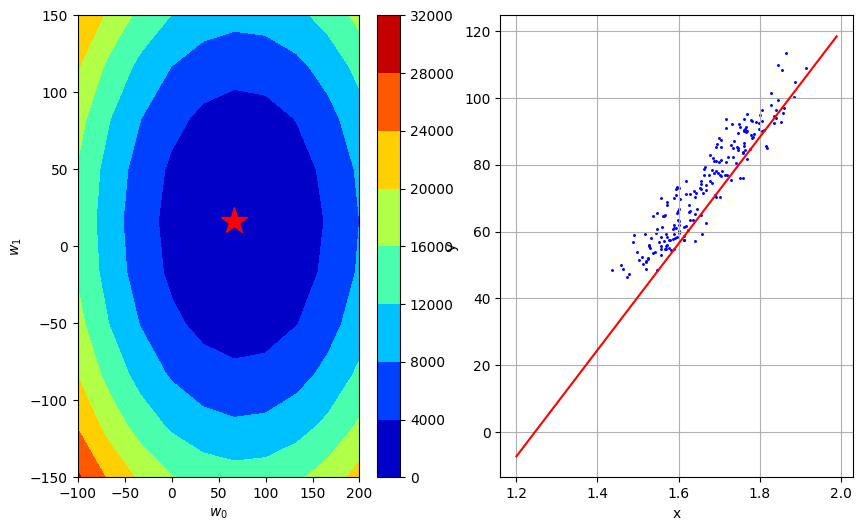

In [558]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************
#raise NotImplementedError
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star_2, w0_star_2, w1_star_2 = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star_2, w0=w0_star_2, w1=w1_star_2, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_subsampled_no_outlier_plot")


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

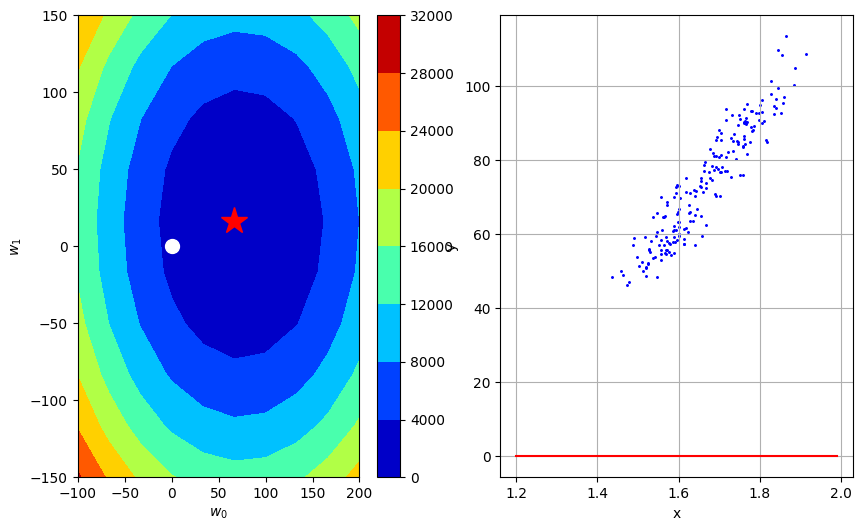

In [559]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

In [560]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
#raise NotImplementedError
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
y.shape, tx.shape

((202,), (202, 2))

Grid Search: loss*=109.17758755205352, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.001 seconds
GD: execution time=0.156 seconds


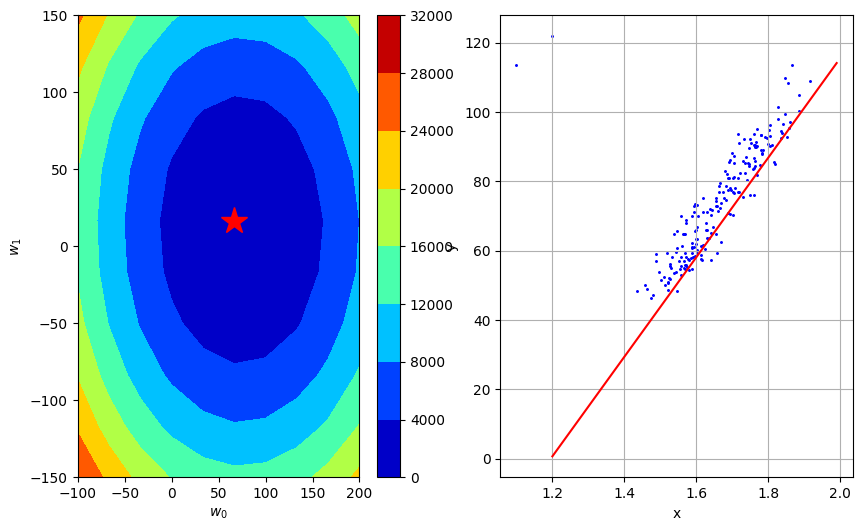

In [561]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# ***************************************************
#raise NotImplementedError
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star_2, w0_star_2, w1_star_2 = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star_2, w0=w0_star_2, w1=w1_star_2, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_subsampled_outlier_plot")


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

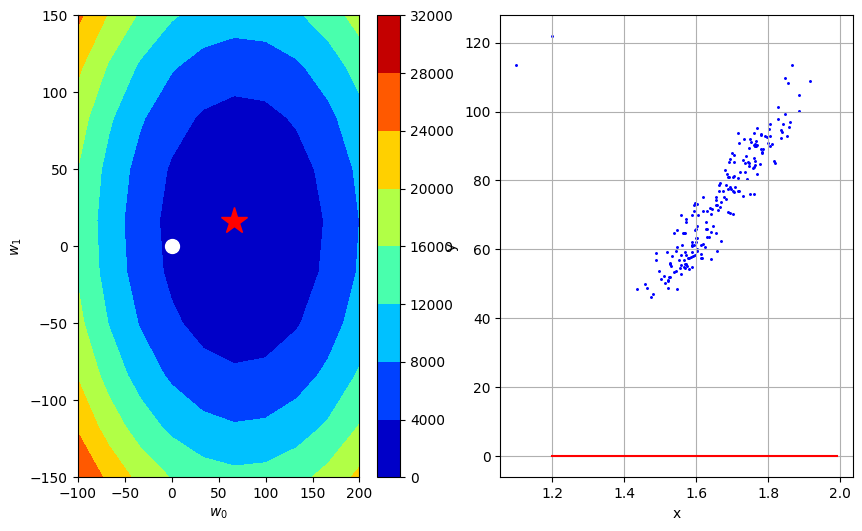

In [562]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 6. Subgradient descent

In [563]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
y.shape, tx.shape

((10000,), (10000, 2))

In [582]:
def compute_subgradient_mae(y, tx, w, gamma):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient and loss
    # ***************************************************
    e=y-tx.dot(w)
    loss=np.mean(np.abs(e))
    subgrad=-(tx.T.dot(np.sign(e)))/len(y) #sign(e) to deal with the hint
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: update w by subgradient
    # ***************************************************
    #raise NotImplementedError
    w=w-gamma*subgrad
    return w, loss

In [581]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):

        w,loss=compute_subgradient_mae(y, tx, w, gamma)
        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [583]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=73.29392200210518, w0=0.7, w1=3.6592551211356295e-15
SubGD iter. 1/499: loss=72.59392200210519, w0=1.4, w1=7.318510242271259e-15
SubGD iter. 2/499: loss=71.89392200210519, w0=2.0999999999999996, w1=1.0977765363406888e-14
SubGD iter. 3/499: loss=71.19392200210518, w0=2.8, w1=1.4637020484542518e-14
SubGD iter. 4/499: loss=70.49392200210517, w0=3.5, w1=1.8296275605678148e-14
SubGD iter. 5/499: loss=69.79392200210518, w0=4.2, w1=2.195553072681378e-14
SubGD iter. 6/499: loss=69.09392200210519, w0=4.9, w1=2.561478584794941e-14
SubGD iter. 7/499: loss=68.39392200210519, w0=5.6000000000000005, w1=2.9274040969085036e-14
SubGD iter. 8/499: loss=67.69392200210517, w0=6.300000000000001, w1=3.293329609022066e-14
SubGD iter. 9/499: loss=66.99392200210518, w0=7.000000000000001, w1=3.659255121135629e-14
SubGD iter. 10/499: loss=66.29392200210518, w0=7.700000000000001, w1=4.025180633249192e-14
SubGD iter. 11/499: loss=65.59392200210519, w0=8.4, w1=4.3911061453627544e-14
SubGD it

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

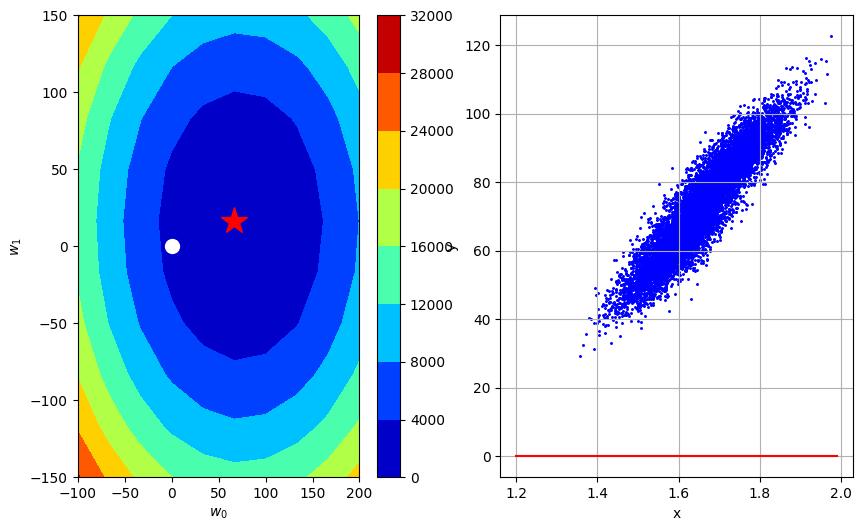

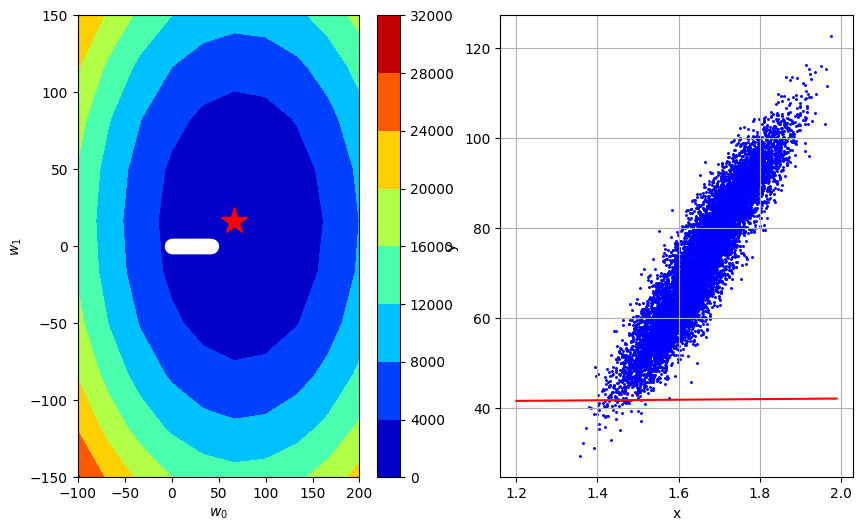

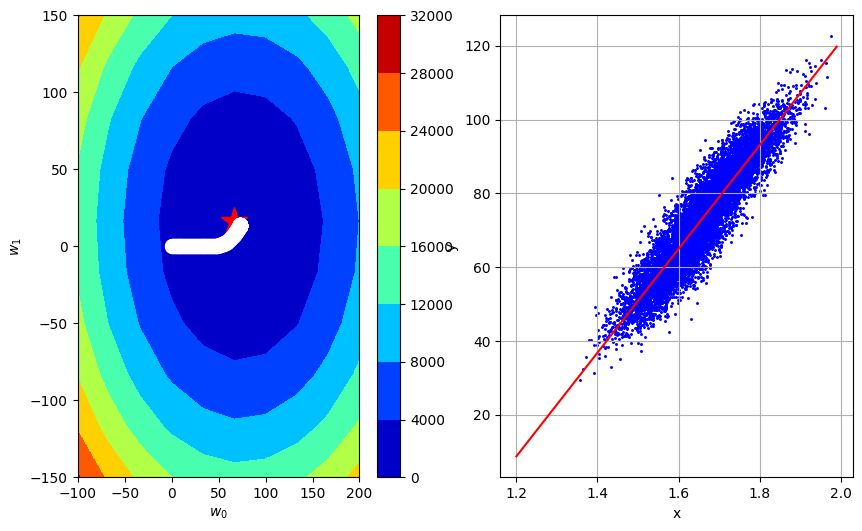

In [584]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

GD iter. 0/499: loss=2829.2722244384163, w0=51.54259072181181, w1=10.132993413506076
GD iter. 1/499: loss=267.05002587794183, w0=67.00536793835533, w1=13.172891437557823
GD iter. 2/499: loss=36.450028007500265, w0=71.64420110331838, w1=14.084860844773322
GD iter. 3/499: loss=15.696028199160635, w0=73.03585105280729, w1=14.358451666937965
GD iter. 4/499: loss=13.828168216410077, w0=73.45334603765397, w1=14.440528913587356
GD iter. 5/499: loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
GD iter. 6/499: loss=13.644931152102242, w0=73.61616908174418, w1=14.472539039780616
GD iter. 7/499: loss=13.643569482174817, w0=73.62744144633503, w1=14.474755125440149
GD iter. 8/499: loss=13.643446931881353, w0=73.63082315571229, w1=14.47541995113801
GD iter. 9/499: loss=13.643435902354941, w0=73.63183766852546, w1=14.475619398847368
GD iter. 10/499: loss=13.64343490969756, w0=73.63214202236942, w1=14.475679233160175
GD iter. 11/499: loss=13.643434820358397, w0=73.6322333285226, w1=1

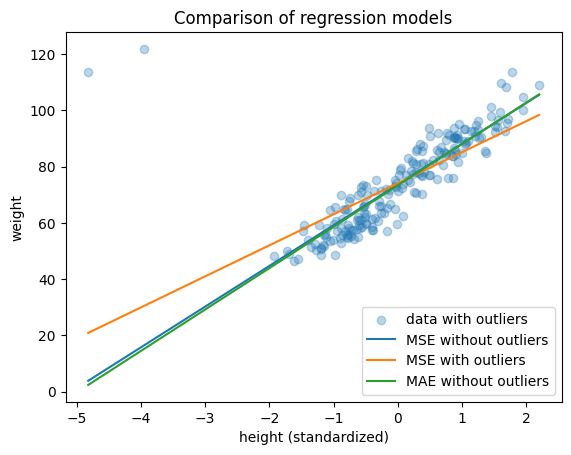

In [568]:
import numpy as np
import matplotlib.pyplot as plt

height_no, weight_no, _ = load_data(sub_sample=True, add_outlier=False)
x_no, mean_x_no, std_x_no = standardize(height_no)
y_no, tx_no = build_model_data(x_no, weight_no)
y_no.shape, tx_no.shape
w0 = np.zeros(tx_no.shape[1])
max_iters, gamma = 500, 0.7
losses_no, ws_no = gradient_descent(y_no, tx_no, w0, max_iters, gamma)
w_mse_no_out = ws_no[-1]

height_out, weight_out, _ = load_data(sub_sample=True, add_outlier=True)
x_out, mean_x_out, std_x_out = standardize(height_out)
y_out, tx_out = build_model_data(x_out, weight_out)
y_out.shape, tx_out.shape

losses_out, ws_out = gradient_descent(y_out, tx_out, w0, max_iters, gamma)
w_mse_out = ws_out[-1]

sub_losses, sub_ws = subgradient_descent(y_no, tx_no, w0, max_iters, gamma)
w_mae_out = sub_ws[-1]

plt.scatter(tx_out[:,1], y_out, alpha=0.3, label="data with outliers")
x_vals = np.linspace(tx_out[:,1].min(), tx_out[:,1].max(), 200)
X_plot = np.c_[np.ones_like(x_vals), x_vals]

y_mse_no = np.dot(X_plot, w_mse_no_out)
y_mse_ou = np.dot(X_plot, w_mse_out)
y_mae    = np.dot(X_plot, w_mae_out)

plt.plot(x_vals, y_mse_no, label="MSE without outliers")
plt.plot(x_vals, y_mse_ou, label="MSE with outliers")
plt.plot(x_vals, y_mae,    label="MAE without outliers")
plt.xlabel("height (standardized)")
plt.ylabel("weight")
plt.title("Comparison of regression models")
plt.legend()
plt.show()


# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [569]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        #raise NotImplementedError
        for y_b, tx_b in batch_iter(y,tx,batch_size,num_batches=1,shuffle=True):
            e_b=y_b-tx_b.dot(w)
            subgrad_b=-(tx_b.T.dot(np.sign(e_b)))/len(y_b)
            w=w-gamma*subgrad_b
        err_ss=y-tx.dot(w)
        loss=np.mean(np.abs(err_ss))
        losses.append(loss)
        ws.append(w)

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [570]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=72.59392200210519, w0=0.7, w1=0.16359977555621696
SubSGD iter. 1/499: loss=71.89392200210517, w0=1.4, w1=0.5417946666096853
SubSGD iter. 2/499: loss=71.19392200210515, w0=2.0999999999999996, w1=2.0751858459255783
SubSGD iter. 3/499: loss=70.49392200210517, w0=2.8, w1=3.1747043677716977
SubSGD iter. 4/499: loss=69.79392200210516, w0=3.5, w1=5.308600642359236
SubSGD iter. 5/499: loss=69.09392200210516, w0=4.2, w1=4.624098718918089
SubSGD iter. 6/499: loss=68.39392200210516, w0=4.9, w1=4.003253447644629
SubSGD iter. 7/499: loss=67.69392200210515, w0=5.6000000000000005, w1=3.54974179066536
SubSGD iter. 8/499: loss=66.99392200210517, w0=6.300000000000001, w1=3.08318978175654
SubSGD iter. 9/499: loss=66.29392200210516, w0=7.000000000000001, w1=2.7183198527452963
SubSGD iter. 10/499: loss=65.59392200210517, w0=7.700000000000001, w1=1.9929973507546832
SubSGD iter. 11/499: loss=64.89392200210517, w0=8.4, w1=2.3554159333771305
SubSGD iter. 12/499: loss=64.19392200210517,

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

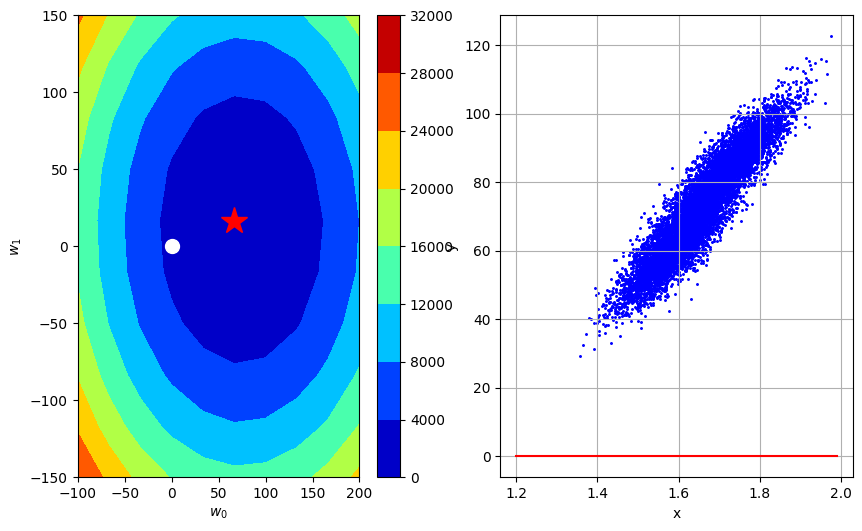

In [571]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))